In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('BostonHousing.csv') #loading the dataset

In [5]:
df.head() #displaying the first few rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info() #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
print(df.isnull().sum()) #missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [9]:
# Fill missing values with the mean
df['rm'] = df['rm'].fillna(df['rm'].mean())

In [10]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


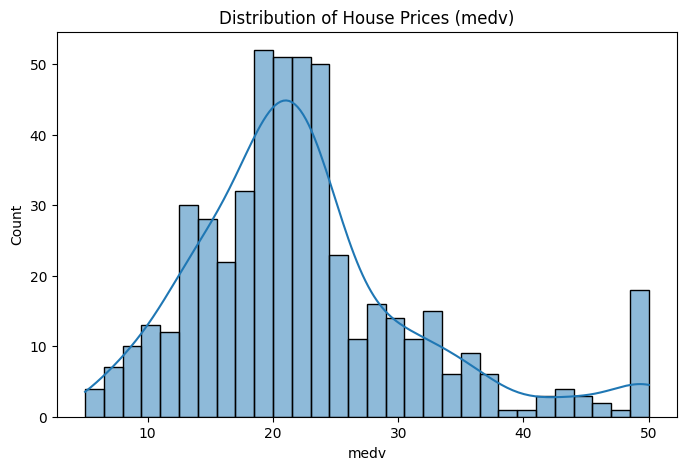

In [12]:
# Histogram of house prices
plt.figure(figsize=(8,5)) #Sets the figure size to 8x5 inches for better readability.
sns.histplot(df['medv'], bins=30, kde=True) #df['medv']: Selects the target variable (median house price),bins=30: Divides data into 30 bins (intervals), kde=True: Adds a KDE curve, which shows the smooth probability distribution.
 
plt.title('Distribution of House Prices (medv)')
plt.show() #Displays the histogram.

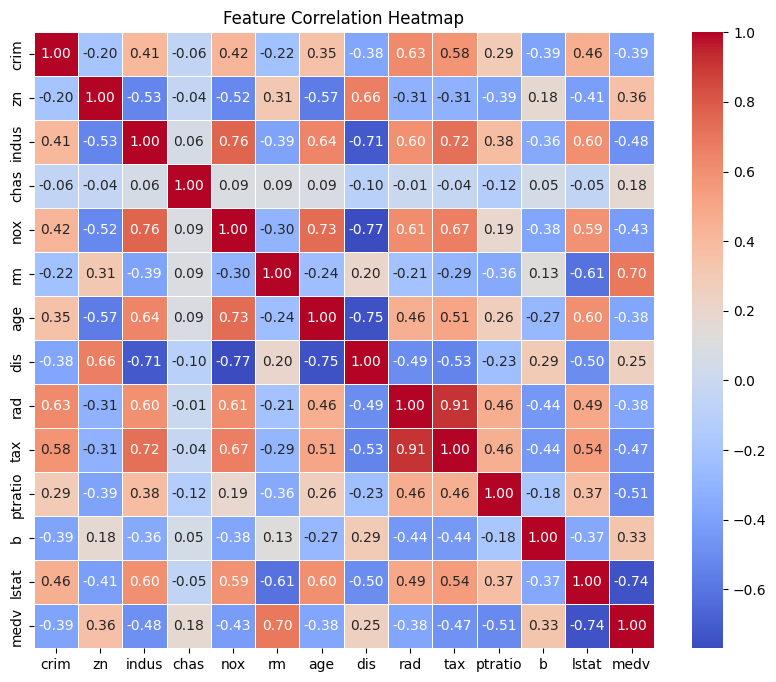

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8)) #Sets the size of the figure to 10x8 inches for better readability.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  #df.corr() → Computes the correlation matrix of numerical columns,sns.heatmap(...) → Creates the heatmap using the correlation values, annot=True → Displays the correlation values inside each cell, cmap='coolwarm' → Uses the "coolwarm" color map (blue for negative, red for positive correlation), fmt=".2f" → Formats the values to 2 decimal places,  linewidths=0.5 → Adds thin lines between cells for better separation.   
plt.title("Feature Correlation Heatmap")
plt.show()

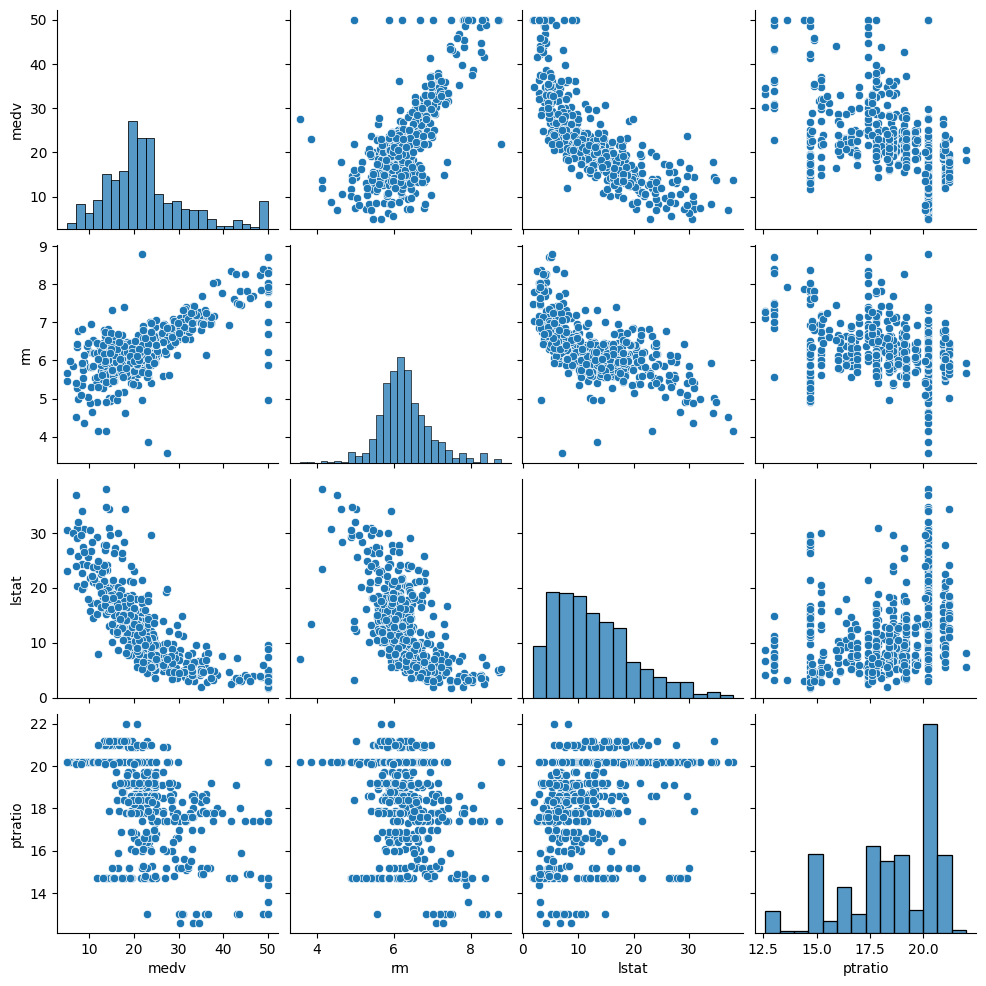

In [14]:
# Pairplot of selected features
selected_features = ['medv', 'rm', 'lstat', 'ptratio']
sns.pairplot(df[selected_features])
plt.show()

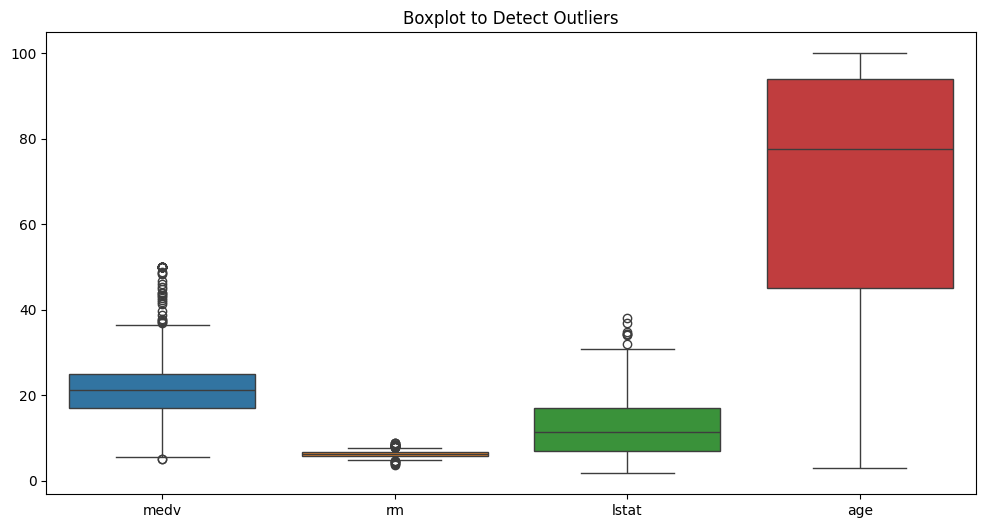

In [15]:
# Boxplots to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['medv', 'rm', 'lstat', 'age']])  # Choose relevant columns
plt.title('Boxplot to Detect Outliers')
plt.show()

In [16]:
# Selected features (X) and target variable (y) , data preparation for linear regression
X = df[['rm', 'lstat', 'age']]  #  features 
y = df['medv']  # Target variable (house price)

In [17]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initializing the Linear Regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 31.28819422815297
R² Score: 0.573345423080786


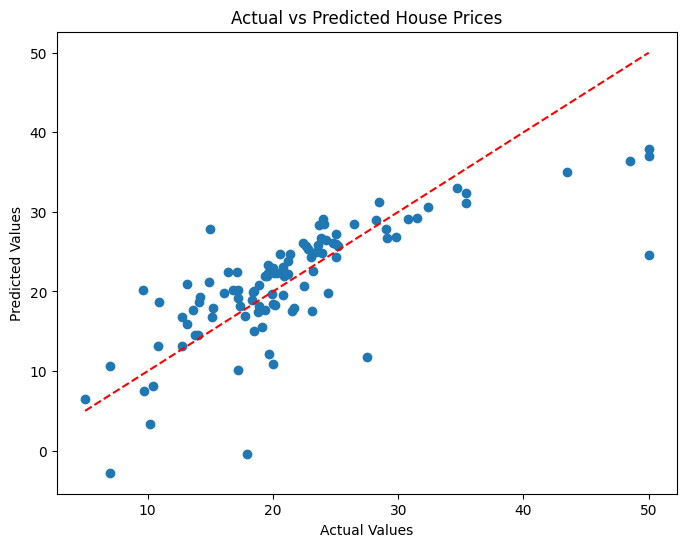

In [21]:
# Plotting actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [22]:
# Print the coefficients
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)


Coefficients:  [ 5.35985082 -0.6646989   0.01170406]
Intercept:  -3.5820698995771494
